In [1]:
import pandas as pd
data = pd.read_table(r'household_power_consumption.txt', sep=";",low_memory=False)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [3]:
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


Como se puede observar hay columnas que deberian ser numéricas pero aparecen como object, vamos a ver cuales son los valores erroneos y mirar si es posible pasarlos a numerico o descartarlos o en el caso de hacer un modelo darles una imputacion. 

In [4]:
ga_nn = pd.to_numeric(data['Global_active_power'], errors='coerce').isna() 
gr_nn = pd.to_numeric(data['Global_reactive_power'], errors='coerce').isna()
v_nn = pd.to_numeric(data['Voltage'], errors='coerce').isna() 
gi_nn = pd.to_numeric(data['Global_intensity'], errors='coerce').isna()
s1_nn = pd.to_numeric(data['Voltage'], errors='coerce').isna() 
s2_nn = pd.to_numeric(data['Global_intensity'], errors='coerce').isna()


In [5]:
print(data.loc[ga_nn, 'Global_active_power'].value_counts())
print(data.loc[gr_nn, 'Global_active_power'].value_counts())
print(data.loc[v_nn, 'Global_active_power'].value_counts())
print(data.loc[gi_nn, 'Global_active_power'].value_counts())
print(data.loc[s1_nn, 'Global_active_power'].value_counts())
print(data.loc[s2_nn, 'Global_active_power'].value_counts())


?    25979
Name: Global_active_power, dtype: int64
?    25979
Name: Global_active_power, dtype: int64
?    25979
Name: Global_active_power, dtype: int64
?    25979
Name: Global_active_power, dtype: int64
?    25979
Name: Global_active_power, dtype: int64
?    25979
Name: Global_active_power, dtype: int64


Al parecer son filas con el mismo problema de tener ? en el campo, se va a proceder a eliminar estas filas con el problema.

Antes de realizar esa eliminacion vamos a ver la cantidad de campos nulos

In [6]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

Se ve que los nulos deben tener el mismo problema que las otras columnas solo que ahora aperece como nulo, vamos a remover los nulos y revisar si los problemas se arreglan.

In [7]:
data = data[~data.isnull().any(axis=1)]

In [8]:
cols = data.columns.drop(['Date','Time'])
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')


In [10]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Listo ya tenemos a nuestras filas numericas como numericas y las nulas eliminadas.

Procedemos a crear la columna de fecha-hora para ordenar los datos por ella. 

In [11]:
data["Datetime"]=pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 172.0+ MB


Procedemos a hacer un analisis preliminar de los datos:


In [13]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Se observa que en Sub_metering_1 es en su gran mayoría 0  y ademas todos los Sub_metering menos el 3 tambien estan muy desbalanceadas. Se ve que Voltage es muy constante. de resto se ve muy similar el promedio a la desviación estandard. 

procedemos a hacer la grafica de mapa de correlaciones:

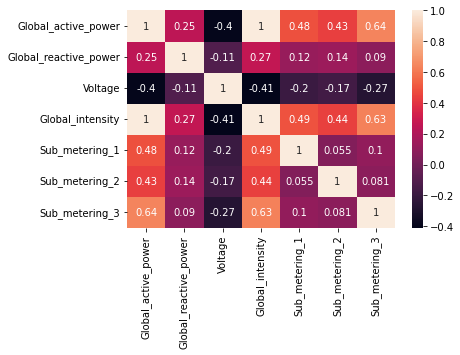

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import  seaborn as sb
matrix = data[cols].corr()
sb.heatmap(matrix, annot=True)
plt.show()

Se observa una leve correlacion de Global_active_power con Sub_metering_3 y Global_intensity y de Sub_metering_3 y Global_intensity. De resto no sobrepasan de valor absoluto de 0.5. 

Vamos a agrupar por hora y fecha del dia para ver como se comportan cada una de las variables